## 신경망과 딥러닝
# 전이학습2
- 이번에는 VGG16 과 InceptionV3 모델 자체도 학습을 시켜보자

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

### VGG16 전체 재학습

In [2]:
# input_shape=(224,224) 로 놓으면 노트북 용량에 따라 다운될 수 있음
vgg16 = keras.applications.vgg16.VGG16(include_top=False, weights='imagenet',
                            input_shape=(150,150,3))

In [3]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [4]:
model = keras.models.Sequential()
model.add(vgg16)
model.add(keras.layers.GlobalAveragePooling2D()) # 채널별 평균값을 구한다
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 14,846,273
Trainable params: 14,846,273
Non-trainable params: 0
_________________________________________________________________


In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
train_generator = train_datagen.flow_from_directory(
    'cats_and_dogs_small/train',
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [7]:
validation_datagen = ImageDataGenerator(rescale=1/255.)
validation_generator = train_datagen.flow_from_directory(
    'cats_and_dogs_small/validation',
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [8]:
# vgg16 도 훈련시킨다
# vgg16.trainable = True

In [9]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.00001),
              metrics=['acc'])

In [10]:
history = model.fit(train_generator, epochs=5, steps_per_epoch=100,
                validation_data=validation_generator, validation_steps=50)

Epoch 1/5
100/100 [==============================] - 83s 683ms/step - loss: 0.4564 - acc: 0.7795 - val_loss: 0.3335 - val_acc: 0.8390
Epoch 2/5
100/100 [==============================] - 68s 678ms/step - loss: 0.1870 - acc: 0.9300 - val_loss: 0.2344 - val_acc: 0.8930
Epoch 3/5
100/100 [==============================] - 70s 698ms/step - loss: 0.1125 - acc: 0.9550 - val_loss: 0.1829 - val_acc: 0.9210
Epoch 4/5
100/100 [==============================] - 69s 690ms/step - loss: 0.0672 - acc: 0.9770 - val_loss: 0.1627 - val_acc: 0.9270
Epoch 5/5
100/100 [==============================] - 68s 683ms/step - loss: 0.0297 - acc: 0.9955 - val_loss: 0.1596 - val_acc: 0.9380


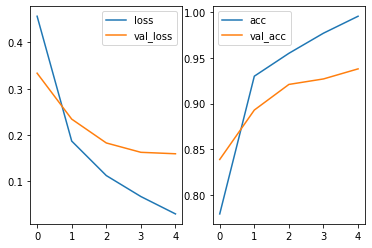

In [11]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])

### VGG16 일부 재학습

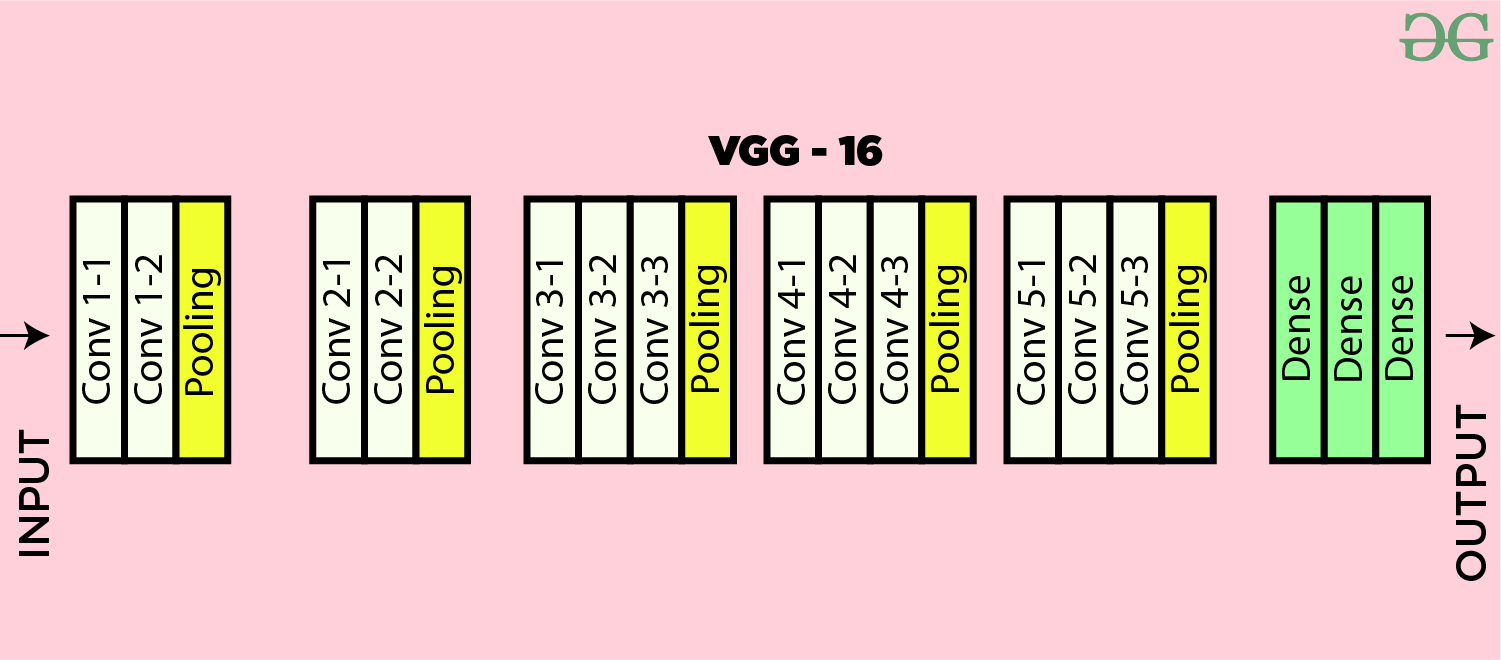

In [12]:
vgg16 = keras.applications.vgg16.VGG16(include_top=False, weights='imagenet',
                            input_shape=(150,150,3))

In [13]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [14]:
model = keras.models.Sequential()
model.add(vgg16)
model.add(keras.layers.GlobalAveragePooling2D()) # 채널별 평균값을 구한다
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 14,846,273
Trainable params: 14,846,273
Non-trainable params: 0
_________________________________________________________________


In [16]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
train_generator = train_datagen.flow_from_directory(
    'cats_and_dogs_small/train',
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [17]:
validation_datagen = ImageDataGenerator(rescale=1/255.)
validation_generator = train_datagen.flow_from_directory(
    'cats_and_dogs_small/validation',
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [19]:
for i,layer in enumerate(vgg16.layers):
    print(i, layer.name)

0 input_2
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool


In [21]:
# trainable 속성은 model.compile() 호출 전에 실행하여야 한다
for i in range(15):
    vgg16.layers[i].trainable = False

In [22]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.00001),
              metrics=['acc'])

In [23]:
history = model.fit(train_generator, epochs=5, steps_per_epoch=100,
                validation_data=validation_generator, validation_steps=50)

Epoch 1/5
100/100 [==============================] - 35s 339ms/step - loss: 0.4882 - acc: 0.7750 - val_loss: 0.3057 - val_acc: 0.8820
Epoch 2/5
100/100 [==============================] - 34s 336ms/step - loss: 0.2471 - acc: 0.9060 - val_loss: 0.2241 - val_acc: 0.9090
Epoch 3/5
100/100 [==============================] - 34s 338ms/step - loss: 0.1789 - acc: 0.9325 - val_loss: 0.2229 - val_acc: 0.9080
Epoch 4/5
100/100 [==============================] - 34s 340ms/step - loss: 0.1415 - acc: 0.9475 - val_loss: 0.1897 - val_acc: 0.9240
Epoch 5/5
100/100 [==============================] - 35s 345ms/step - loss: 0.1146 - acc: 0.9625 - val_loss: 0.1837 - val_acc: 0.9250


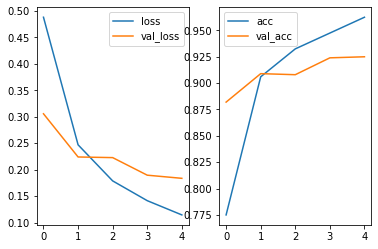

In [24]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])

### Inception-V3 재학습

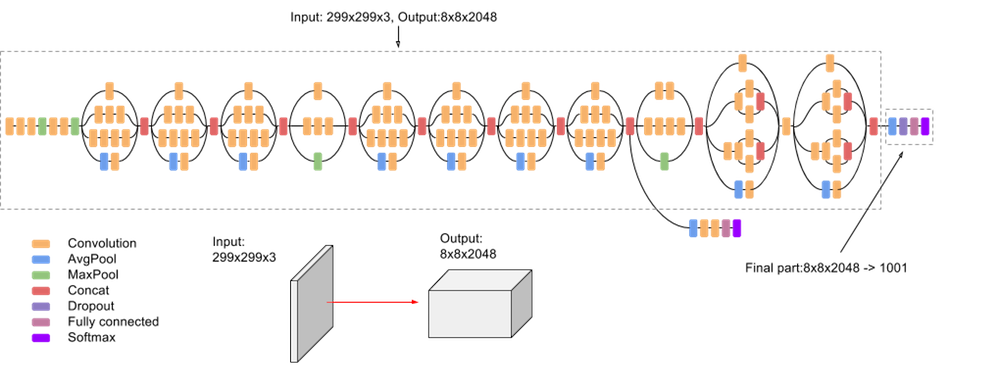

In [25]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [35]:
inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(299,299,3))

In [36]:
model = keras.models.Sequential()
model.add(inception)
model.add(keras.layers.GlobalAveragePooling2D()) # 채널별 평균값을 구한다
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [37]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 8, 8, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               524544    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 22,327,585
Trainable params: 22,293,153
Non-trainable params: 34,432
_________________________________________________________________


In [38]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
train_generator = train_datagen.flow_from_directory(
    'cats_and_dogs_small/train',
    target_size=(299,299),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [39]:
validation_datagen = ImageDataGenerator(rescale=1/255.)
validation_generator = train_datagen.flow_from_directory(
    'cats_and_dogs_small/validation',
    target_size=(299,299),
    batch_size=20,
    class_mode='binary')

Found 1000 images belonging to 2 classes.


In [40]:
for i,layer in enumerate(inception.layers):
    print(i, layer.name)

0 input_4
1 conv2d_94
2 batch_normalization_94
3 activation_94
4 conv2d_95
5 batch_normalization_95
6 activation_95
7 conv2d_96
8 batch_normalization_96
9 activation_96
10 max_pooling2d_4
11 conv2d_97
12 batch_normalization_97
13 activation_97
14 conv2d_98
15 batch_normalization_98
16 activation_98
17 max_pooling2d_5
18 conv2d_102
19 batch_normalization_102
20 activation_102
21 conv2d_100
22 conv2d_103
23 batch_normalization_100
24 batch_normalization_103
25 activation_100
26 activation_103
27 average_pooling2d_9
28 conv2d_99
29 conv2d_101
30 conv2d_104
31 conv2d_105
32 batch_normalization_99
33 batch_normalization_101
34 batch_normalization_104
35 batch_normalization_105
36 activation_99
37 activation_101
38 activation_104
39 activation_105
40 mixed0
41 conv2d_109
42 batch_normalization_109
43 activation_109
44 conv2d_107
45 conv2d_110
46 batch_normalization_107
47 batch_normalization_110
48 activation_107
49 activation_110
50 average_pooling2d_10
51 conv2d_106
52 conv2d_108
53 conv2d

In [41]:
# trainable 속성은 model.compile() 호출 전에 실행하여야 한다
for i in range(280): # conv2d_89 이전의 레이어는 훈련하지 않는다 (mixed9 이하)
    inception.layers[i].trainable = False

In [42]:
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.00001),
              metrics=['acc'])

In [43]:
history = model.fit(train_generator, epochs=5, steps_per_epoch=100,
                validation_data=validation_generator, validation_steps=50)

Epoch 1/5
100/100 [==============================] - 62s 583ms/step - loss: 0.2771 - acc: 0.9435 - val_loss: 0.1173 - val_acc: 0.9860
Epoch 2/5
100/100 [==============================] - 57s 574ms/step - loss: 0.0762 - acc: 0.9895 - val_loss: 0.0491 - val_acc: 0.9910
Epoch 3/5
100/100 [==============================] - 59s 588ms/step - loss: 0.0434 - acc: 0.9910 - val_loss: 0.0340 - val_acc: 0.9920
Epoch 4/5
100/100 [==============================] - 59s 591ms/step - loss: 0.0308 - acc: 0.9940 - val_loss: 0.0262 - val_acc: 0.9900
Epoch 5/5
100/100 [==============================] - 59s 584ms/step - loss: 0.0170 - acc: 0.9975 - val_loss: 0.0224 - val_acc: 0.9930


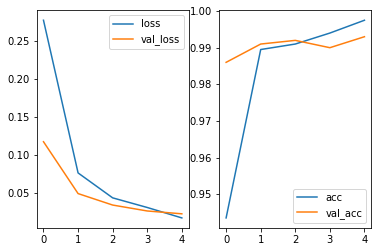

In [44]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

plt.subplot(1,2,2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])